In [ ]:
import re
import pandas as pd

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove special symbols and emojis
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Remove @usernames
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # Remove leading and trailing whitespaces
    tweet = tweet.strip()

    return tweet

# Apply the preprocessing function to the 'tweet' column of the data frame
#df['tweet'] = df['tweet'].apply(preprocess_tweet)

#print(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
data=pd.read_excel("/content/drive/My Drive/Myfiles/Total_mixed_data.xlsx")
data.head()

,full_text,lang,Sentiment
0,"Egypt, which relies heavily on the Nile River ...",en,Negative
1,Egypt fears that the dam's construction could...,en,Negative
2,Egypt has been opposed to the construction of ...,en,Negative
3,Sudan has also expressed concerns about the GE...,en,Negative
4,Sudan fears that the dam could lead to increas...,en,Negative


In [ ]:
len(data)

14066

In [ ]:
data.columns

Index(['full_text', 'lang', 'Sentiment'], dtype='object')

In [ ]:
data["full_text"].isnull().sum()

3

In [ ]:
data["full_text"]=data["full_text"].fillna(data["full_text"].mode()[0])

In [ ]:
data['full_text'] =data['full_text'].apply(preprocess_tweet)


In [ ]:
data["full_text"][4000:4100]

4000    Sabi  The Nile Basin suffers from an absence o...
4001    Sabi  The GERD will benefit Egypt which will h...
4002    Sabi  The intl community should pressure Sudan...
4003    Sabi  Egypt and Sudan need to sign the agreeme...
4004    Sabi  The Grand Ethiopian Renaissance Dam GERD...
                              ...                        
4095    _AfricanUnion is mediating the talks between E...
4096    Ethiopians call on the Arab League to refrain ...
4097    For many years Egyptians have been misinformed...
4098    The Grand Ethiopian Renaissance Dam GERD will ...
4099    A research by the Uni of Waterloo UWaterloo sh...
Name: full_text, Length: 100, dtype: object

In [ ]:
data["Sentiment"].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
data["Sentiment"]=data["Sentiment"].fillna("Negative")

In [ ]:
data["Sentiment"] = data["Sentiment"].replace("Positve", "Negative")

# Generate wordcloud for English tweets

In [ ]:
eng_tweet=data[data["lang"]=="en"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


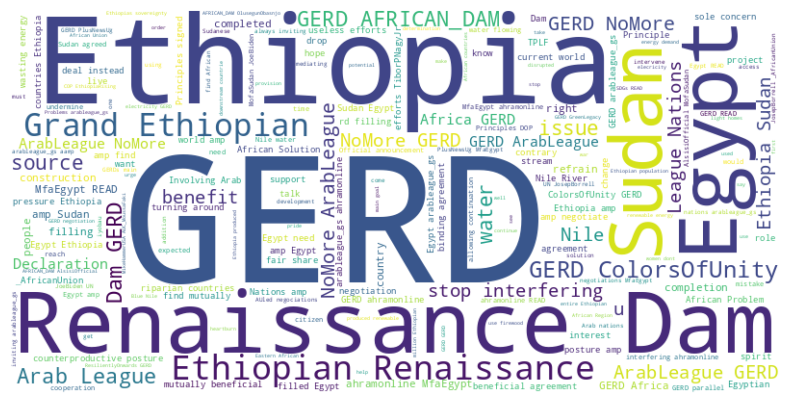

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#from ArabicStemmer import ArabicStemmer



# Combine all tweets into a single string
text = " ".join(tweet for tweet in eng_tweet.full_text)
import nltk
nltk.download('stopwords')
# Define stop words for English
english_stop_words = set(stopwords.words('english'))

# Define stop words for Arabic
#arabic_stemmer = ArabicStemmer()
#arabic_stop_words = set(arabic_stemmer.get_stop_words())

# Generate a word cloud
#wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=english_stop_words.union(arabic_stop_words)).generate(text)
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=english_stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate Word Cloud for Arabic Tweets

In [ ]:
arabic_tweet=data[data["lang"]=="ar"]

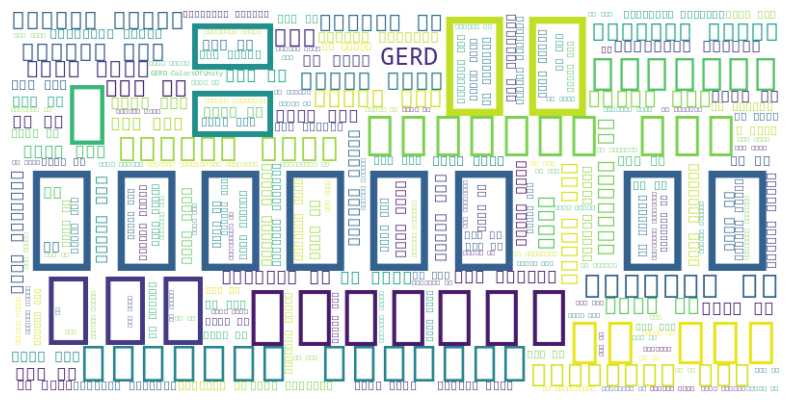

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all tweets into a single string
text = " ".join(tweet for tweet in arabic_tweet.full_text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(14, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Amharic Tweets Word Cloud

In [ ]:
Amh_tweet=data[data["lang"]=="am"]

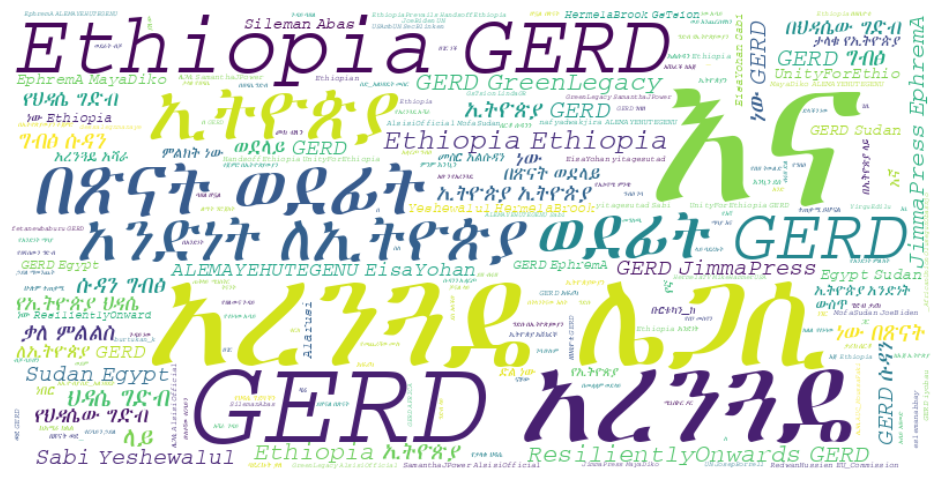

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({'tweet': ["በጣም የሚጣል የተለያዩ አገራት የሚካሄዱት ተጠቃሚዎች በተለያዩ የራስን ምልክት ራስ የሚሰጥ ማንነት ነው",
                             "የአማርኛ መጽሐፍ ስልክ መልካም የፊደል መጠቀም አይደለም"]})

# Combine all tweets into a single string
text = " ".join(tweet for tweet in Amh_tweet.full_text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, font_path='/content/drive/My Drive/Myfiles/jiretsl.ttf', background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Build LSTM-CNN Model

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, concatenate
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Load the tokenizer and mBERT model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = TFAutoModel.from_pretrained(model_name)
bert_model.trainable = False

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Encode the training and testing data using the tokenizer

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
x_train = tokenizer(list(train_data["full_text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')
x_test = tokenizer(list(test_data["full_text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')

In [ ]:
len(list(train_data["full_text"]))

11252

In [ ]:
x_train[100].ids

[101,
 11065,
 10301,
 25090,
 19777,
 10109,
 12547,
 11426,
 10111,
 10531,
 10124,
 11053,
 10114,
 10435,
 10111,
 11951,
 10106,
 28336,
 10537,
 23763,
 11758,
 10347,
 28407,
 13565,
 146,
 36110,
 11758,
 10347,
 10109,
 12547,
 10377,
 10134,
 10111,
 12647,
 10124,
 10142,
 169,
 11695,
 10635,
 13028,
 10529,
 11773,
 10111,
 12286,
 10473,
 13028,
 11758,
 11760,
 10271,
 10111,
 10347,
 10109,
 12547,
 10882,
 10142,
 10105,
 16812,
 20993,
 10474,
 75633,
 10124,
 11053,
 10155,
 20442,
 32173,
 10169,
 20440,
 10345,
 11327,
 10271,
 14864,
 75633,
 10124,
 10114,
 36474,
 21092,
 10354,
 10169,
 42426,
 15217,
 10422,
 10111,
 10169,
 17446,
 15217,
 11132,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
len(tokenizer(list(test_data["full_text"])))

3

In [ ]:
# Convert the labels to integer-encoded values
label_encoder = LabelEncoder()
label_encoder.fit(train_data["Sentiment"])
y_train = label_encoder.transform(train_data["Sentiment"])
y_test = label_encoder.transform(test_data["Sentiment"])

In [ ]:
len(y_test)

2814

In [ ]:
train_data["Sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
len(y_train)

11252

In [ ]:
unique_labels = set(y_train)
distinct_classes = list(unique_labels)

# Display the distinct classes
print(distinct_classes)

[0, 1, 2]


In [ ]:
# Build the LSTM-CNN model
import tensorflow as tf
input_layer = Input(shape=(128,), dtype=tf.int32, name="input_layer")
embedding_layer = bert_model(input_layer)[0]
lstm_layer = LSTM(64, return_sequences=True)(embedding_layer)
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(lstm_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dropout_layer = Dropout(0.5)(pooling_layer)
output_layer = Dense(len(label_encoder.classes_), activation="softmax")(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  177853440
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             128, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [ ]:
len(y_train)

11252

In [ ]:
len(x_train)

3

In [ ]:
len(x_train['input_ids'])

11252

In [ ]:
# Train the model
lstm_cnn_model = model.fit(x_train['input_ids'], y_train, batch_size=32, epochs=25, validation_split=0.2)


Epoch 1/25
282/282 [==============================] - 107s 380ms/step - loss: 0.3609 - accuracy: 0.8500 - val_loss: 0.3660 - val_accuracy: 0.8507
Epoch 2/25
282/282 [==============================] - 107s 379ms/step - loss: 0.3440 - accuracy: 0.8531 - val_loss: 0.3626 - val_accuracy: 0.8498
Epoch 3/25
282/282 [==============================] - 107s 380ms/step - loss: 0.3201 - accuracy: 0.8659 - val_loss: 0.3425 - val_accuracy: 0.8641
Epoch 4/25
282/282 [==============================] - 107s 379ms/step - loss: 0.3014 - accuracy: 0.8751 - val_loss: 0.3314 - val_accuracy: 0.8685
Epoch 5/25
282/282 [==============================] - 107s 380ms/step - loss: 0.2767 - accuracy: 0.8847 - val_loss: 0.3290 - val_accuracy: 0.8783
Epoch 6/25
282/282 [==============================] - 106s 378ms/step - loss: 0.2656 - accuracy: 0.8948 - val_loss: 0.3203 - val_accuracy: 0.8703
Epoch 7/25
282/282 [==============================] - 107s 380ms/step - loss: 0.2585 - accuracy: 0.8973 - val_loss: 0.3060 -

In [ ]:
# Save the model as an HDF5 file
model.save('/content/drive/My Drive/Myfiles/Models/LSTM_CNN_Model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
from transformers import TFBertModel
import tensorflow.keras.backend as K

# Define a custom_objects dictionary that includes the TFBertModel layer
custom_objects = {'TFBertModel': TFBertModel}

# Register the custom_objects dictionary with Keras
K.set_learning_phase(0)
model = tf.keras.models.load_model('/content/drive/My Drive/Myfiles/Models/LSTM_CNN_Model.h5', custom_objects=custom_objects)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test['input_ids'], y_test, batch_size=32)

88/88 [==============================] - 29s 274ms/step - loss: 0.2792 - accuracy: 0.9129


In [ ]:
# Make predictions on the test data
y_pred = np.argmax(model.predict(x_test['input_ids']), axis=-1)

88/88 [==============================] - 28s 275ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Print the classification report and confusion matrix
print("Test Data Classification Report:")
print(classification_report(y_test, y_pred))
print("Test Data Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       662
           1       0.83      0.80      0.82       568
           2       0.93      0.93      0.93      1584

    accuracy                           0.91      2814
   macro avg       0.90      0.90      0.90      2814
weighted avg       0.91      0.91      0.91      2814

Test Data Confusion Matrix:
[[ 632    8   22]
 [  18  456   94]
 [  19   84 1481]]


In [ ]:
# Encode the input text using the tokenizer
input_text = "ركز لنا على موضوع سد النهضة وخاصة سلامة السد"
input_ids = tokenizer.encode(input_text, padding=True, truncation=True, max_length=128, return_tensors='tf')

# Make a prediction using the model
predicted_label = np.argmax(model.predict(input_ids), axis=-1)

# Convert the predicted label to its original class name
label_encoder = LabelEncoder()
label_encoder.fit(["Positive", "Negative", "Neutral"])  # Replace with the actual class names
predicted_class = label_encoder.inverse_transform(predicted_label)

# Print the predicted class
print(predicted_class)

1/1 [==============================] - 0s 119ms/step
['Neutral']


In [ ]:
# Encode the CSV data using the tokenizer
arabic_test=pd.read_excel("/content/drive/My Drive/Myfiles/TotalArabic_Tweets_secondRound.xlsx")
x_csv = tokenizer(list(arabic_test["full text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Make predictions on the CSV data
csv_pred = label_encoder.inverse_transform(np.argmax(model.predict(x_csv['input_ids']), axis=-1))

# Add the predicted labels to the CSV data
arabic_test["predicted_label"] = csv_pred

# Save the CSV data with the predicted labels to a new file
arabic_test.to_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv", index=False)

12/12 [==============================] - 3s 260ms/step


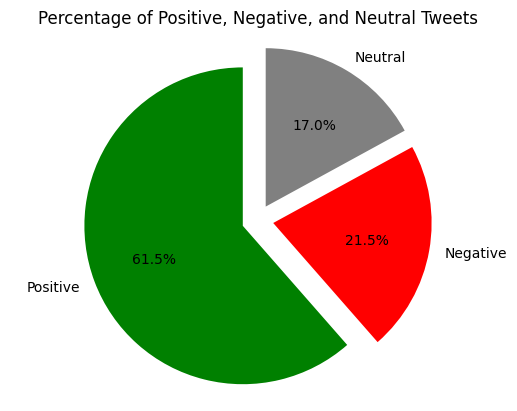

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a pie chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Positive', 'Negative', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')

plt.axis('equal')
plt.show()

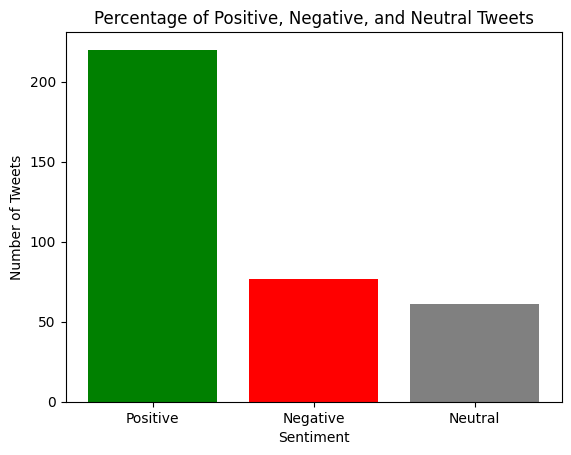

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
#arabic_test_predicted = pd.read_csv("csv_data_predicted.csv")
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a bar chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Positive', 'Negative', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']

plt.bar(labels, sizes, color=colors)

# Add a title and axis labels to the bar chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

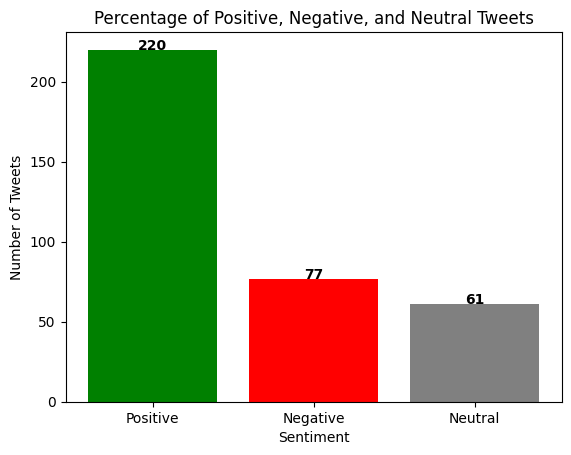

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a bar chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Positive', 'Negative', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']

plt.bar(labels, sizes, color=colors)

# Add the number of tweets at the top of each bar
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center', fontweight='bold')

# Add a title and axis labels to the bar chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

In [ ]:
# Encode the CSV data using the tokenizer
arabic_test=pd.read_excel("/content/drive/My Drive/Myfiles/Second_round__arabic_FinalTweetsAfterComment.xlsx")
x_csv = tokenizer(list(arabic_test["full_text"]), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Make predictions on the CSV data
csv_pred = label_encoder.inverse_transform(np.argmax(model.predict(x_csv['input_ids']), axis=-1))

# Add the predicted labels to the CSV data
arabic_test["predicted_label"] = csv_pred

# Save the CSV data with the predicted labels to a new file
arabic_test.to_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv", index=False)

90/90 [==============================] - 25s 276ms/step


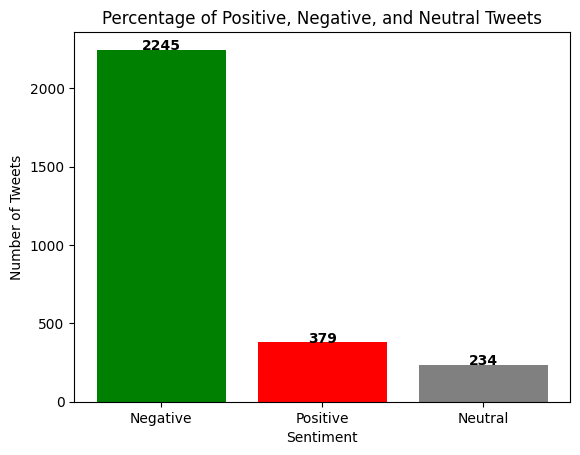

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")

# Count the number of tweets with each label
label_counts = arabic_test_predicted["predicted_label"].value_counts()

# Create a bar chart to display the percentage of Positive, Negative, and Neutral tweets
labels = ['Negative','Positive', 'Neutral']
sizes = [label_counts[0], label_counts[1], label_counts[2]]
colors = ['green', 'red', 'gray']

plt.bar(labels, sizes, color=colors)

# Add the number of tweets at the top of each bar
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center', fontweight='bold')

# Add a title and axis labels to the bar chart
plt.title('Percentage of Positive, Negative, and Neutral Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.show()

In [ ]:
import pandas as pd
"Arabic_Negative_Tweets_final_round"

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")

# Get the texts with the highest counts
top_texts = arabic_test_predicted["full_text"].value_counts().head(10)

# Display the texts with the highest counts
print("Top 10 frequently occurring texts:")
print(top_texts)

Top 10 frequently occurring texts:
وسيتعين علينا شراء الماء والكهرباء بالكامل من إثيوبيا ، ونحن دولة لا نملك المال. لدينا ديون لا نستطيع سدادها ولدينا أزمات اقتصادية. الحل الوحيد هو ضرب السد قبل الجولة الثانية. لن نأسف لهذه الفرصة.                                                                                                     5
هل تعتقد يعني ابو احمد سيضطر للانتخابات وماذا؟ مستحيل. نريد اتفاقية معك في أمريكا والاتحاد الأوروبي. هؤلاء هم الوحيدون الذين يمكنهم الضغط على إثيوبيا للجلوس والتوقيع والالتزام بالآخرين. إنه مستحيل. يرون أن هذا النيل حق لهم ، وعلى مصر والسودان أن يدفعوا لهم حق الماء.                               5
يحمي السودان مصالحه وسلامة مواطنيه بكل الوسائل الممكنة وفق القانون الدولي ضد أي عمل أحادي على #GERD.                                                                                                                                                                                                     5
النيل الرئيسي: من الخرطوم إلى عطبرة سيتعرض هذا القطاع لنفس التأثيرات

In [ ]:
# Display the texts with the highest counts and their counts
print("Top 10 frequently occurring texts:")
for text, count in top_texts.items():
    print(f"{text}: {count}")

Top 10 frequently occurring texts:
وسيتعين علينا شراء الماء والكهرباء بالكامل من إثيوبيا ، ونحن دولة لا نملك المال. لدينا ديون لا نستطيع سدادها ولدينا أزمات اقتصادية. الحل الوحيد هو ضرب السد قبل الجولة الثانية. لن نأسف لهذه الفرصة.: 5
هل تعتقد يعني ابو احمد سيضطر للانتخابات وماذا؟ مستحيل. نريد اتفاقية معك في أمريكا والاتحاد الأوروبي. هؤلاء هم الوحيدون الذين يمكنهم الضغط على إثيوبيا للجلوس والتوقيع والالتزام بالآخرين. إنه مستحيل. يرون أن هذا النيل حق لهم ، وعلى مصر والسودان أن يدفعوا لهم حق الماء.: 5
يحمي السودان مصالحه وسلامة مواطنيه بكل الوسائل الممكنة وفق القانون الدولي ضد أي عمل أحادي على #GERD.: 5
النيل الرئيسي: من الخرطوم إلى عطبرة سيتعرض هذا القطاع لنفس التأثيرات وستنخفض كميات المياه وتنخفض منسوبها وتنخفض مساحة المنحدرات والمراعي المزروعة. وعليه ، يجب على جميع المعنيين اتخاذ الاحتياطات اللازمة للتغلب على آثار التعبئة والتشغيل خلال الفترة من أبريل إلى سبتمبر 2021.: 4
انهيار السد بعد الملئ الثاني هيدمر اجزاء كبيرة من السودان بعد الملئ الثالث سيدمر معظم السودان بعد الملئ الرابع سينه

In [ ]:
#Negativee Arabic Tweets


In [ ]:
neg_Arab = pd.read_excel("/content/drive/My Drive/Myfiles/Arabic_Negative_Tweets_final_round.xlsx")

new_df = neg_Arab.full_text.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency']

In [ ]:
new_df.to_excel("/content/drive/My Drive/Myfiles/Top_negative_Arabic_words.xlsx")

<Axes: >

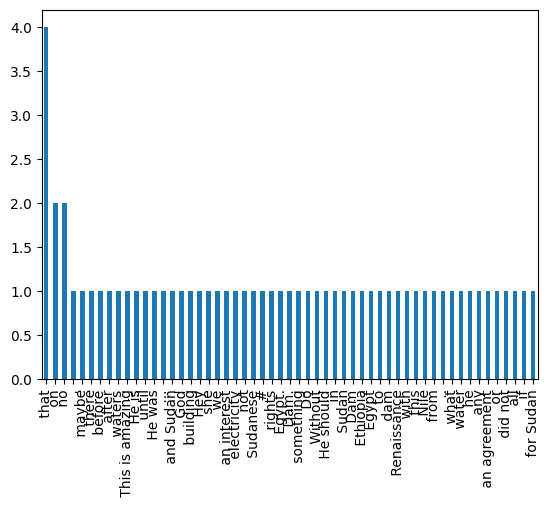

In [ ]:
neg_Arab_trans_to_En= pd.read_excel("/content/drive/My Drive/Myfiles/Top_negative_Arabic_Engl_translated_words.xlsx")
neg_Arab_trans_to_En["Word"][:60].value_counts().plot.bar("Word",14)

In [ ]:
neg_Arab_trans_to_En= pd.read_excel("/content/drive/My Drive/Myfiles/GERD Tweets SecondRound.xlsx")
neg_en=neg_Arab_trans_to_En[neg_Arab_trans_to_En["lang"]=="en"]
neg_en

,full text,lang,Sentiment
0,"Egypt, which relies heavily on the Nile River ...",en,Negative
1,Egypt fears that the dam's construction could...,en,Negative
2,Egypt has been opposed to the construction of ...,en,Negative
3,Sudan has also expressed concerns about the GE...,en,Negative
4,Sudan fears that the dam could lead to increas...,en,Negative
...,...,...,...
848,I would like to clarify to the citizens when t...,en,Neutral
850,A beautiful step. I hope that you will open di...,en,Positive
852,"Oh, Minister, regarding the dam, are there tec...",en,Negative
854,Our aspirations for negotiation regarding the ...,en,Neutral


In [ ]:
neg_en = neg_en.rename(columns={"full text": "full_text"})


In [ ]:
neg_en

,full_text,lang,Sentiment
0,"Egypt, which relies heavily on the Nile River ...",en,Negative
1,Egypt fears that the dam's construction could...,en,Negative
2,Egypt has been opposed to the construction of ...,en,Negative
3,Sudan has also expressed concerns about the GE...,en,Negative
4,Sudan fears that the dam could lead to increas...,en,Negative
...,...,...,...
848,I would like to clarify to the citizens when t...,en,Neutral
850,A beautiful step. I hope that you will open di...,en,Positive
852,"Oh, Minister, regarding the dam, are there tec...",en,Negative
854,Our aspirations for negotiation regarding the ...,en,Neutral


In [ ]:
#Plot Negative English Tweets

In [ ]:
neg_en1=neg_en[neg_en["Sentiment"]=="Negative"]


In [ ]:
neg_en1.head()

,full_text,lang,Sentiment
0,"Egypt, which relies heavily on the Nile River ...",en,Negative
1,Egypt fears that the dam's construction could...,en,Negative
2,Egypt has been opposed to the construction of ...,en,Negative
3,Sudan has also expressed concerns about the GE...,en,Negative
4,Sudan fears that the dam could lead to increas...,en,Negative


In [ ]:
neg_en1.full_text.str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,"Egypt,",which,relies,heavily,on,the,Nile,River,for,water,...,None,None,None,None,None,None,None,None,None,None
1,Egypt,fears,that,the,dam's,construction,could,lead,to,"droughts,",...,None,None,None,None,None,None,None,None,None,None
2,Egypt,has,been,opposed,to,the,construction,of,the,dam,...,None,None,None,None,None,None,None,None,None,None
3,Sudan,has,also,expressed,concerns,about,the,GERD's,impact,on,...,None,None,None,None,None,None,None,None,None,None
4,Sudan,fears,that,the,dam,could,lead,to,increased,flooding,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Sudan's,interest,comes,first,in,any,negotiation,regarding,the,Renaissance,...,None,None,None,None,None,None,None,None,None,None
840,Your,loved,"ones,","sir,",now,the,wars,have,become,over,...,None,None,None,None,None,None,None,None,None,None
842,The,issue,of,the,dam,is,not,"neglected,",and,the,...,None,None,None,None,None,None,None,None,None,None
844,"Hey,",the,story,of,this,Egyptian,Minister,of,Irrigation...,and,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
neg_en1.full_text.str.split(expand=True).stack().value_counts()

the            975
and            516
of             429
to             376
is             244
              ... 
upstream         1
enormous         1
Tuesday          1
warned           1
procedures?      1
Length: 2701, dtype: int64

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


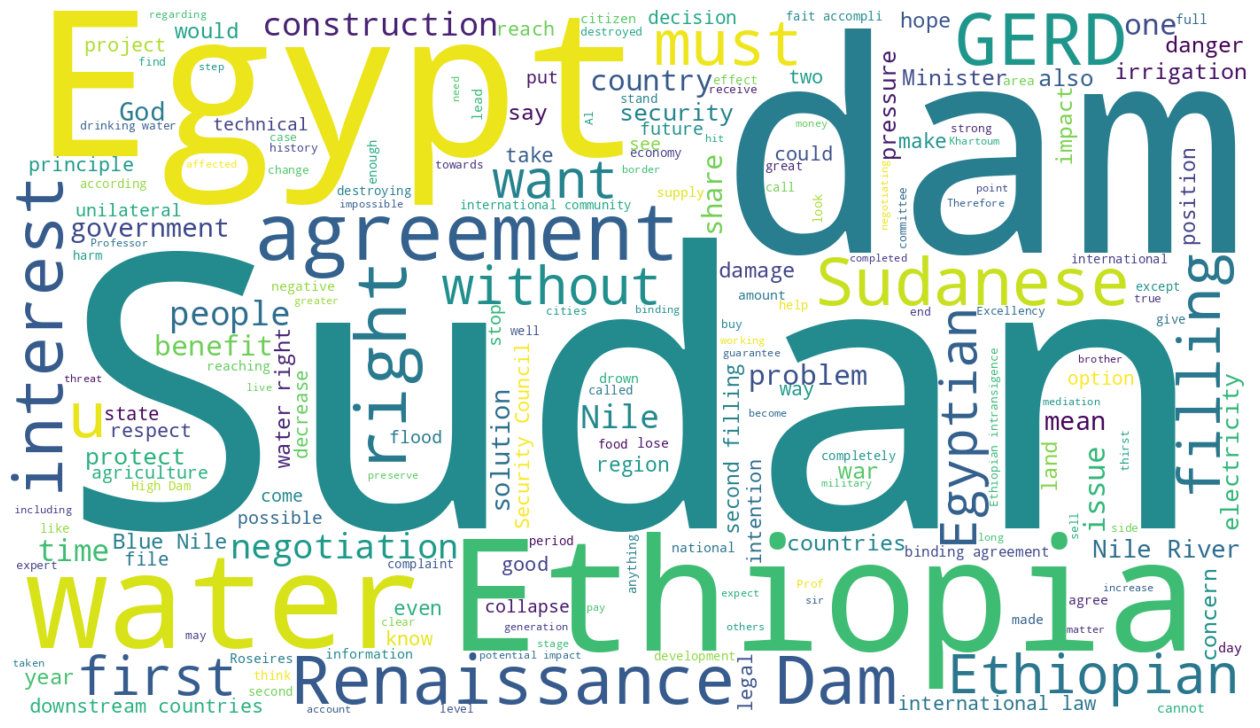

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#from ArabicStemmer import ArabicStemmer



# Combine all tweets into a single string
text = " ".join(tweet for tweet in neg_en1.full_text)
import nltk
nltk.download('stopwords')
# Define stop words for English
english_stop_words = set(stopwords.words('english'))

# Define stop words for Arabic
#arabic_stemmer = ArabicStemmer()
#arabic_stop_words = set(arabic_stemmer.get_stop_words())

# Generate a word cloud
#wordcloud = WordCloud(width=1000, height=600, background_color="white", stopwords=english_stop_words.union(arabic_stop_words)).generate(text)
wordcloud = WordCloud(width=1400, height=800, background_color="white", stopwords=english_stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Amharic Positive News

In [ ]:
amh_twt= pd.read_excel("/content/drive/My Drive/Myfiles/Total_mixed_data.xlsx")
amh_twt=amh_twt[amh_twt["lang"]=="am"]

In [ ]:
amh_pos_twt=amh_twt[amh_twt["Sentiment"]=="Positive"]

In [ ]:
amh_pos_twt.head()

,full_text,lang,Sentiment
5982,RT @fetanewbaburu: #GERD \nጎበዝ የመጨረሻው ሙሊት አውራው...,am,Positive
5983,RT @fetanewbaburu: #GERD \nጎበዝ የመጨረሻው ሙሊት አውራው...,am,Positive
5984,#GERD \nጎበዝ የመጨረሻው ሙሊት አውራው ህዳሴ ግድብ 20 ቀን ቀረው ...,am,Positive
5985,RT @MereditFernand3: የግብፅና ተላላኪዎቿ ምቀኝነት ቱሪስቶች ...,am,Positive
5986,RT @MameS_Ethio: 🚨 #ግድባችን አንዱ ለሁሉም ፤ ሁሉም ለአንዱ ...,am,Positive


In [ ]:
amh_pos_twt.full_text.str.split(expand=True).stack().value_counts()

#GERD        2237
RT           1642
እና           1138
#Ethiopia    1039
#ኢትዮጵያ        741
             ... 
የምትሆነው          1
አርአያ፡           1
አንድነት፡          1
ጥንካሬና፡          1
ትብብር!           1
Length: 9506, dtype: int64

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#from ArabicStemmer import ArabicStemmer



# Combine all tweets into a single string
text = " ".join(tweet for tweet in amh_pos_twt.full_text)
import nltk
nltk.download('stopwords')
# Define stop words for English
english_stop_words = set(stopwords.words('english'))

# Define stop words for Arabic
#arabic_stemmer = ArabicStemmer()
#arabic_stop_words = set(arabic_stemmer.get_stop_words())

# Generate a word cloud
#wordcloud = WordCloud(width=1000, height=600, background_color="white", stopwords=english_stop_words.union(arabic_stop_words)).generate(text)
wordcloud = WordCloud(width=1400, height=800, background_color="white", stopwords=english_stop_words).generate(text)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: ignored

In [ ]:
new_df_ar_en = neg_en1.full_text.str.split(expand=True).stack().value_counts().reset_index()

new_df_ar_en = ['Word', 'Frequency']

In [ ]:
new_df_ar_en.head()

AttributeError: ignored

In [ ]:
new_df.head(50)

,Word,Frequency
0,،,1164
1,من,620
2,في,615
3,على,520
4,أن,431
5,السودان,402
6,السد,313
7,إثيوبيا,289
8,لا,277
9,مصر,241


In [ ]:
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")

new_df = arabic_test_predicted.full_text.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency']

In [ ]:
new_df.head(20)

,Word,Frequency
0,،,2380
1,في,1791
2,من,1769
3,السودان,1234
4,على,1217
5,السد,906
6,أن,821
7,مصر,706
8,لا,675
9,إثيوبيا,617


In [ ]:
df2 = arabic_test_predicted["full_text"]
df2.head()

0    الحرب ليست في صالح السودان أو مصر ..اذا دمر ال...
1                             تتوقع انو مصر تضرب السد؟
2    موضوع سد النهضه دا موضوع كبير ومرعب في نفس الو...
3    تفاوضوا مع أثيوبيا فرادي و ليس كدولتين حليفتين...
4    منافسة في الكهرباء !! مصر دوله تصدر الكهرباء س...
Name: full_text, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(df2)

TypeError: ignored

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the CSV data with the predicted labels
arabic_test_predicted = pd.read_csv("/content/drive/My Drive/Myfiles/csv_data_predicted_2.csv")



# Create a CountVectorizer object to count the occurrences of each word
# Create a CountVectorizer object to count the occurrences of each word
vectorizer = CountVectorizer()

# Count the occurrences of each word in the texts
text_counts = vectorizer.fit_transform(arabic_test_predicted["full_text"])

# Get the frequency counts of each word
word_counts = pd.DataFrame(text_counts.sum(axis=0), columns=vectorizer.get_feature_names()).transpose()
word_counts.columns = ["Frequency"]

# Display the frequency of each word
print("Word frequency counts:")
print(word_counts)

AttributeError: ignored

In [ ]:
filtered_text_list = [val for val in text if val not in stop_words]
filtered_text = ' '.join(filtered_text_list)
filtered_text_list[:10]